# Stage 1: Business Understanding

Business use case is about building a predictive model that can predict the positive or negative sentiment for customer based on their feedback.


In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Embedding
%matplotlib inline


# Stage 2: Data Understanding

The dataset that we are going to use for this "Amazon" product review. The dataset consits of of total #346355 the documents contain positive and negative reviews regarding the product. further details regarding dataset can be found to be at http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care.json.gz

**Prerequisite:** I am using Anaconda, to install Tensorflow, and Keras libraries

**Step 1:** Importing data. Pandas DataFrame gives massive functionality to work on data thus, here we are using pandas to import data.

In [7]:
# df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False, nrows=1000) # testing for purpose only
df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False)
df.shape



(346355, 10)

# Stage 3: Data Preparation

Making an additional column to decide "Positive or Nagative" review based ob the score

In [8]:
df['review_class'] = [1 if x > 3 else 0 for x in df.overall]
df.head(2)



,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_class
0,0,159985130X,"[1, 1]",5.0,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,1
1,1,159985130X,"[1, 1]",4.0,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,1


# Stage 4: Modeling

#### Training and Testing Sets 
Like any other supervised machine learning problems, we need to divide out data into training and testing sets, to do so we used the train_test_split utility from the sklearn.model_selection library

#### Finding TFID

Mulitplying the term frequency of a word by the inverse document frequency. The TF stands for "Term frequency" while IDF stand for "Inverse Document Frequency" The ft-idf value increases proportionally to the number of documents in word appears in the document.

The term frequency is calculated as:

Term frequency = (Number of Occurrences of a word)/(Total words in the document)  

And the Inverse Document Frequency is calculated as:

IDF(word) = Log((Total number of documents)/(Number of documents containing the word))  


#### Training Text Classification Model and Predicting Sentiment

In Machine Learning, we always divide our data into training and testing part meaning that we train our model on training data and then we check the accuracy of a model on testing data. Testing your model on testing data will only help you evaluate the efficiency of model.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.review_class, test_size=0.3, random_state=0)
 
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')


# Convert a collection of raw documents to a matrix
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8', max_features=10000)
# Learn vocabulary and idf from training set.
vectorizer.fit(x_train.values.astype('U'))
# Learn vocabulary and idf, return term-document matrix. 
# Uses the vocabulary and document frequencies (df) learned by fit.
x_train_tv = vectorizer.transform(x_train.values.astype('U'))
x_test_tv = vectorizer.transform(x_test.values.astype('U'))


x_train shape: (242448,)
y_train shape: (242448,)

x_test shape: (103907,)
y_test shape: (103907,)



Importing required Modules. We need Sequential module for initializing NN and dense module to add Hidden Layers.
name of model as Classifier as our business problem is find the sentiment of customer based on the feedback

Adding multiple hidden layer will take bit effort. We will add hidden layers one by one using dense function. In the below code you will see a lot of arguments

**output_dim.** It is simply the number of nodes you want to add to this layer. init is the initialization of Stochastic Gradient Decent. In Neural Network we need to assign weights to each mode which is nothing but importance of that node. At the time of initialization, weights should be close to 0 and we will randomly initialize weights using uniform function. 
**input_dim** parameter is needed only for first layer as model doesn’t know the number of our input variables, in our case **"10,000"**, In the second layer model automatically knows the number of input variable from the first hidden layer.

**Activation Function:** Very important to understand. Neuron applies activation function to weighted sum(summation of Wi * Xi where w is weight, X is input variable and i is suffix of W and X).

Sigmoid function in our output layer as we want binary result

In [7]:
# Initializing Neural Network
model = Sequential()
model.add(Dense(units=6, kernel_initializer="uniform", activation='relu', input_dim=10000))
model.add(Dense(units=6, kernel_initializer="uniform", activation='relu'))
model.add(Dense(units=1, kernel_initializer="uniform", activation='sigmoid'))



Added multiple layers to out classifier now let’s compile them which can be done using compile method.

**Optimizer**, this is nothing but the algorithm you wanna use to find optimal set of weights

As this is binary classification problem, we'll use binary_crossentropy loss function and the Adam optimizer is usually good choice(feel fre to try others)

We want to improve performance of our neural network based on accuracy so add **metrics** as accuracy

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


fit() to the fit our model **Batch size** is used to specify the number of observation after which you want to update weight. 

**Epoch** is nothing but the total number of iterations. Choosing the value of batch size and epoch is trial and error there is no specific rule for that.

In [9]:
history = model.fit(x_train_tv, y_train, batch_size=100, epochs=10, validation_split=0.3)


Train on 169713 samples, validate on 72735 samples
Epoch 1/10
169713/169713 [==============================] - 58s 341us/step - loss: 0.4060 - acc: 0.8295 - val_loss: 0.3028 - val_acc: 0.8692
Epoch 2/10
169713/169713 [==============================] - 57s 333us/step - loss: 0.2867 - acc: 0.8778 - val_loss: 0.2974 - val_acc: 0.8730
Epoch 3/10
169713/169713 [==============================] - 57s 333us/step - loss: 0.2753 - acc: 0.8834 - val_loss: 0.2985 - val_acc: 0.8728
Epoch 4/10
169713/169713 [==============================] - 57s 333us/step - loss: 0.2696 - acc: 0.8863 - val_loss: 0.3009 - val_acc: 0.8725
Epoch 5/10
169713/169713 [==============================] - 56s 333us/step - loss: 0.2649 - acc: 0.8880 - val_loss: 0.3017 - val_acc: 0.8718
Epoch 6/10
169713/169713 [==============================] - 58s 341us/step - loss: 0.2604 - acc: 0.8902 - val_loss: 0.3019 - val_acc: 0.8713
Epoch 7/10
169713/169713 [==============================] - 57s 335us/step - loss: 0.2560 - acc: 0.8915

# Stage 5: Evaluation


**Predicting** the test set result. The prediction result will give you probability of the customer sentiment. 
We will convert that probability into binary 0 and 1.


In [10]:
y_predict = model.predict(x_test_tv)
y_predict = (y_predict > 0.5)


We are evaluating our model performance. We already have original results and thus we can build confusion matrix to check the accuracy of model.


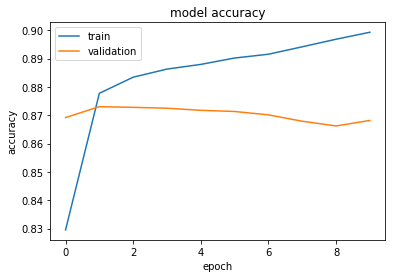

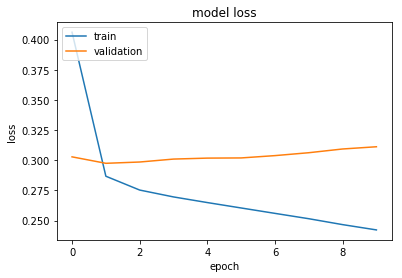

In [11]:
%matplotlib inline
history = model.history

#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


 [[11205  8705]
 [ 5044 78953]]
 [[ 5044 78953]
 [11205  8705]]


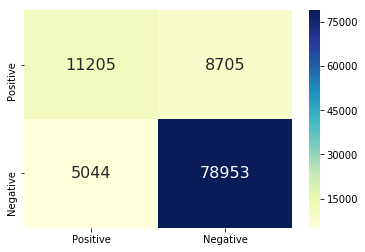

In [12]:
%matplotlib inline
# Confusion matrix
cm = confusion_matrix(y_test, y_predict)

rotated = cm[::-1]
print('',cm)
print('', rotated)
df_cm = pd.DataFrame(cm, ['Positive', 'Negative'], ['Positive', 'Negative'])
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g', cmap="YlGnBu")


The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

AUC 0.8924569090377992


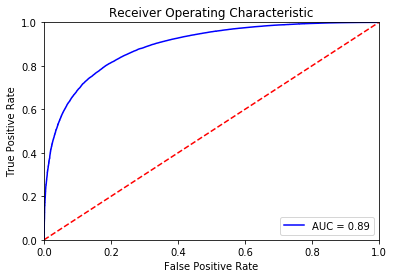

In [14]:
%matplotlib inline
# AUC report
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict(x_test_tv))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC', roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [15]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
               cmap=sns.diverging_palette(760, 153, l=70, n=7, center="dark"))


               precision    recall  f1-score   support

           0       0.68      0.57      0.62     19910
           1       0.90      0.94      0.92     83997

   micro avg       0.87      0.87      0.87    103907
   macro avg       0.79      0.75      0.77    103907
weighted avg       0.86      0.87      0.86    103907



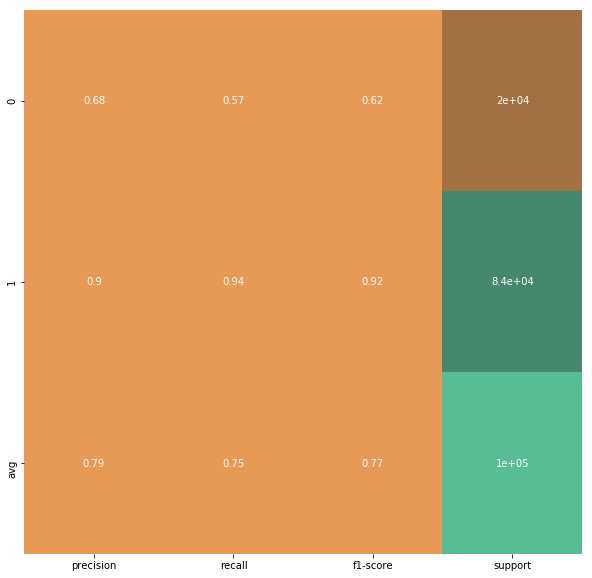

In [65]:
print('', classification_report(y_test, y_predict))
plot_classification_report(y_test, y_predict)

# Stage 6: Deployment

In [16]:
# Training
# transformed 
test_vector = vectorizer.transform(['This is pretty good'])
actualPredict = model.predict(test_vector)
actualPredict = (actualPredict > 0.5) 
actualPredict

array([[ True]])

In [18]:
from sklearn.externals import joblib

joblib.dump(vectorizer, 'classfical-vectorizer.joblib') 
joblib.dump(model,'classical-model.joblib')

['classical-model.joblib']